In [28]:
import pandas as pd 
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.kernel_ridge import KernelRidge
import math

In [100]:
x = np.arange(0,2*math.pi,0.01)
z = np.random.normal(size=len(x))*0.5
signal = np.sin(x)+z

In [101]:
def GuassianKernal(x,h):
    return stats.norm.pdf(x,loc=0,scale=h)

def KernelSmooth(x, signal, h, kernel):
    m = np.zeros(len(x))
    m_hat = np.zeros(len(x))
    for t in range(len(x)):
        this_x = x[t]
        k = kernel(this_x-x,h)
        g = np.mean(k)
        w = k/g
        m[t] = np.mean(w*signal)
        m_hat[t] = (np.sum(w*signal)-w[t]*signal[t])/len(x)
        cv = np.mean((signal-m_hat)**2)
    return m, m_hat, cv        

m,m_hat,cv = KernelSmooth(x, signal, 0.08, GuassianKernal)

In [102]:
print cv

0.278333126434


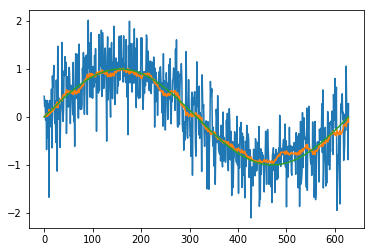

0.27833312643433056

In [103]:
plt.plot(signal)
plt.plot(m_hat)
plt.plot(np.sin(x))
plt.show()
cv

In [104]:
window = 30
nobs = len(x)
for i in range(nobs-window):
    sample_signal = signal[i:i+window]
    sample_x = x[i:i+window]
    sample_m = KernelSmooth(sample_x, sample_signal, 0.08, GuassianKernal)
    

In [105]:
from scipy.optimize import minimize
def chooseH(x, signal, kernel):
    def objFunc(h):
        m,m_hat, cv = KernelSmooth(x, signal, h, kernel)
        return cv
    res = minimize(objFunc, 1, 
                   method='Nelder-Mead', tol=1e-6, 
                  bounds = (0, None)
                  )
    m_, m_hat_, cv_ = KernelSmooth(x, signal, res.x[0], kernel)
    return res.x[0], m_, m_hat_, cv_ 
    

In [106]:
h_min, m_, m_hat_, cv_  = chooseH(x, signal, GuassianKernal)
print h_min, cv_
m,m_hat,cv = KernelSmooth(x, signal, 0.08, GuassianKernal)
print cv
m2,m_hat2,cv2 = KernelSmooth(x, signal, h_min * 0.3, GuassianKernal)
print cv2

0.257698059082 0.272573614532
0.278333126434
0.278538638649


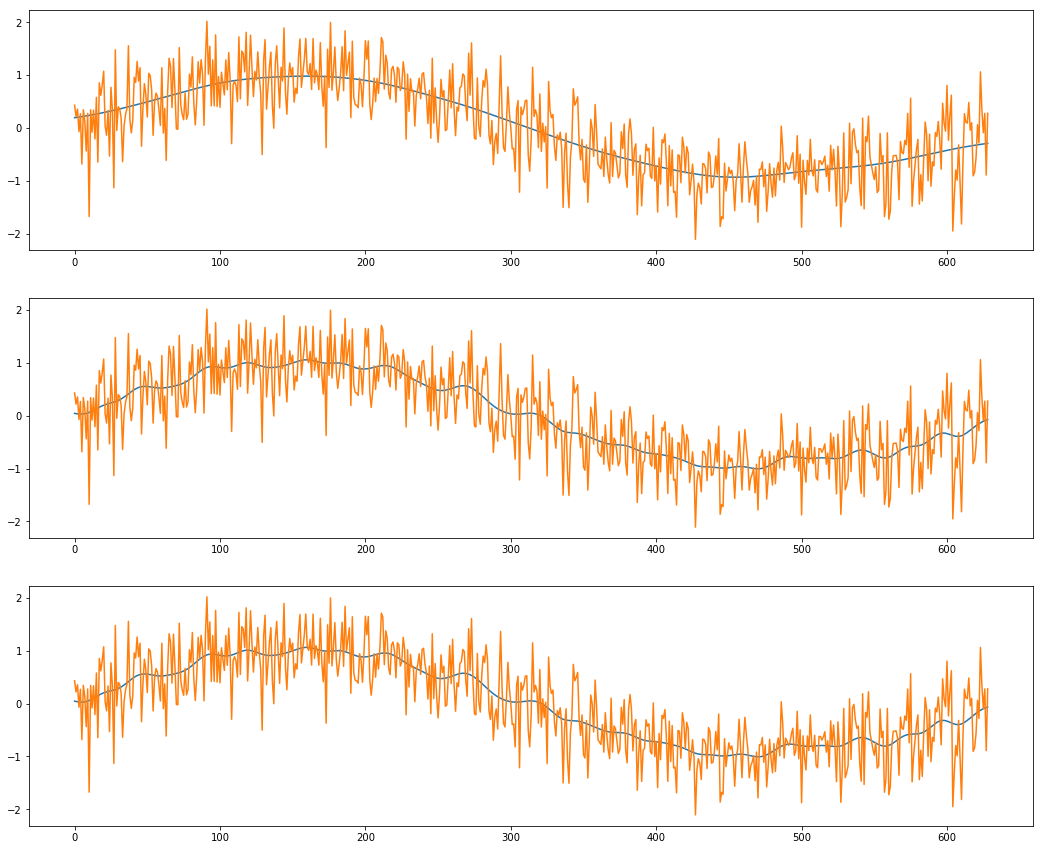

In [107]:
fig = plt.figure(figsize=(18,15))
ax1 = fig.add_subplot(311)
ax1.plot(m_)
ax1.plot(signal)

ax2 = fig.add_subplot(312)
ax2.plot(m)
ax2.plot(signal)

ax3 = fig.add_subplot(313)
ax3.plot(m2)
ax3.plot(signal)

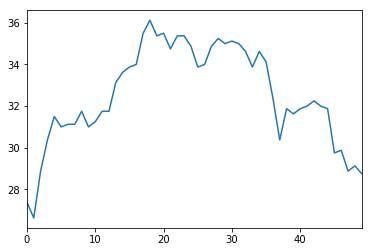

In [87]:
sample_data = pd.read_csv(r"TYC.csv", index_col = 0)['PRC']
sample_data.index = range(len(sample_data))
piece = sample_data[:50]
piece.plot()

In [112]:
x = np.arange(len(piece))
signal = np.array(piece.values)
#print signal
h_min, m_, m_hat_, cv_  = chooseH(x, signal, GuassianKernal)
print h_min, cv_
m2,m_hat2,cv2 = KernelSmooth(x, signal, h_min * 0.15, GuassianKernal)
print cv2

10.7977539063 3.76706226982
68.8741870643


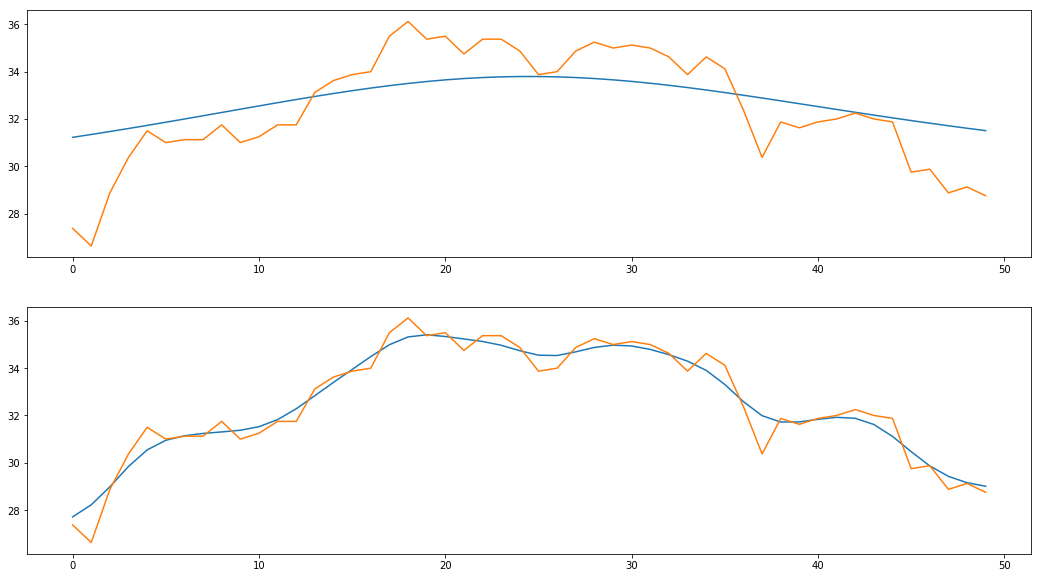

In [113]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(211)
ax1.plot(m_)
ax1.plot(signal)


ax2 = fig.add_subplot(212)
ax2.plot(m2)
ax2.plot(signal)